beta0 = [-47.2374265]   beta1 = 0.0631134499093417   beta2 = 1.4424008106592792   beta3 = -3.6657266874493093
MSE on train data = 411.532569608381   MSE on test data = 541.7959063276487


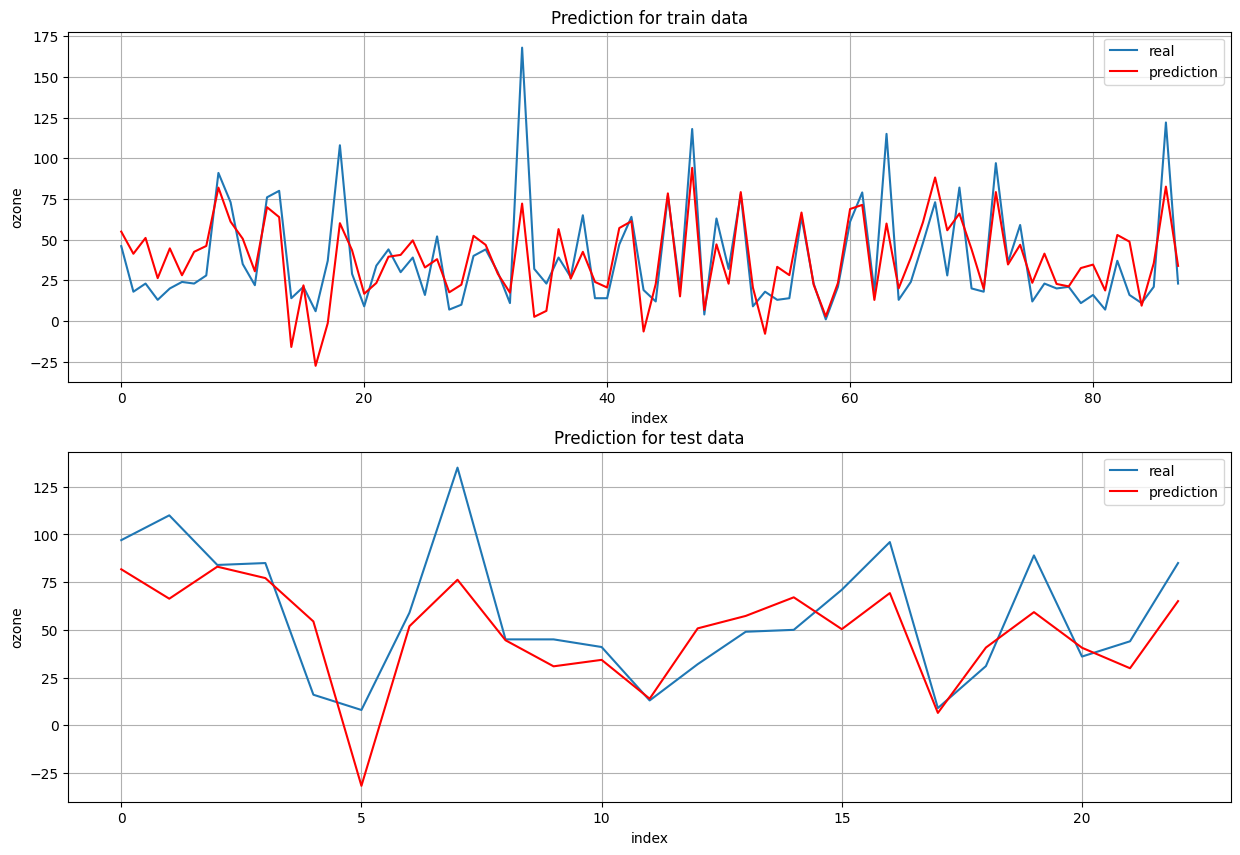

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score 

ozon_data = pd.read_csv('ozon.csv')
Train, Test= train_test_split(ozon_data, test_size=0.2, random_state=25)
X_train = Train[['radiation', 'temperature', 'wind']]
y_train = Train[['ozone']]
X_test  = Test[['radiation', 'temperature', 'wind']]
y_test  = Test[['ozone']]

regression_model = LinearRegression() 
regression_model.fit(X_train, y_train) 

beta0 = regression_model.intercept_
beta1 = regression_model.coef_[0][0]
beta2 = regression_model.coef_[0][1]
beta3 = regression_model.coef_[0][2]
print(f"beta0 = {beta0}   beta1 = {beta1}   beta2 = {beta2}   beta3 = {beta3}")


y_train_predicted = regression_model.predict(X_train) 
mse_train = mean_squared_error(y_train,y_train_predicted) 
y_test_predicted = regression_model.predict(X_test) 
mse_test = mean_squared_error(y_test,y_test_predicted) 
print(f"MSE on train data = {mse_train}   MSE on test data = {mse_test}")



plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.plot(np.arange(len(y_train)),y_train)
plt.plot(np.arange(len(y_train_predicted)),y_train_predicted, color='r')
plt.title("Prediction for train data")
plt.legend(["real","prediction"])
plt.xlabel("index")
plt.ylabel("ozone")
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(np.arange(len(y_test)),y_test)
plt.plot(np.arange(len(y_test_predicted)),y_test_predicted, color='r')
plt.title("Prediction for test data")
plt.legend(["real","prediction"])
plt.xlabel("index")
plt.ylabel("ozone")
plt.grid(True)


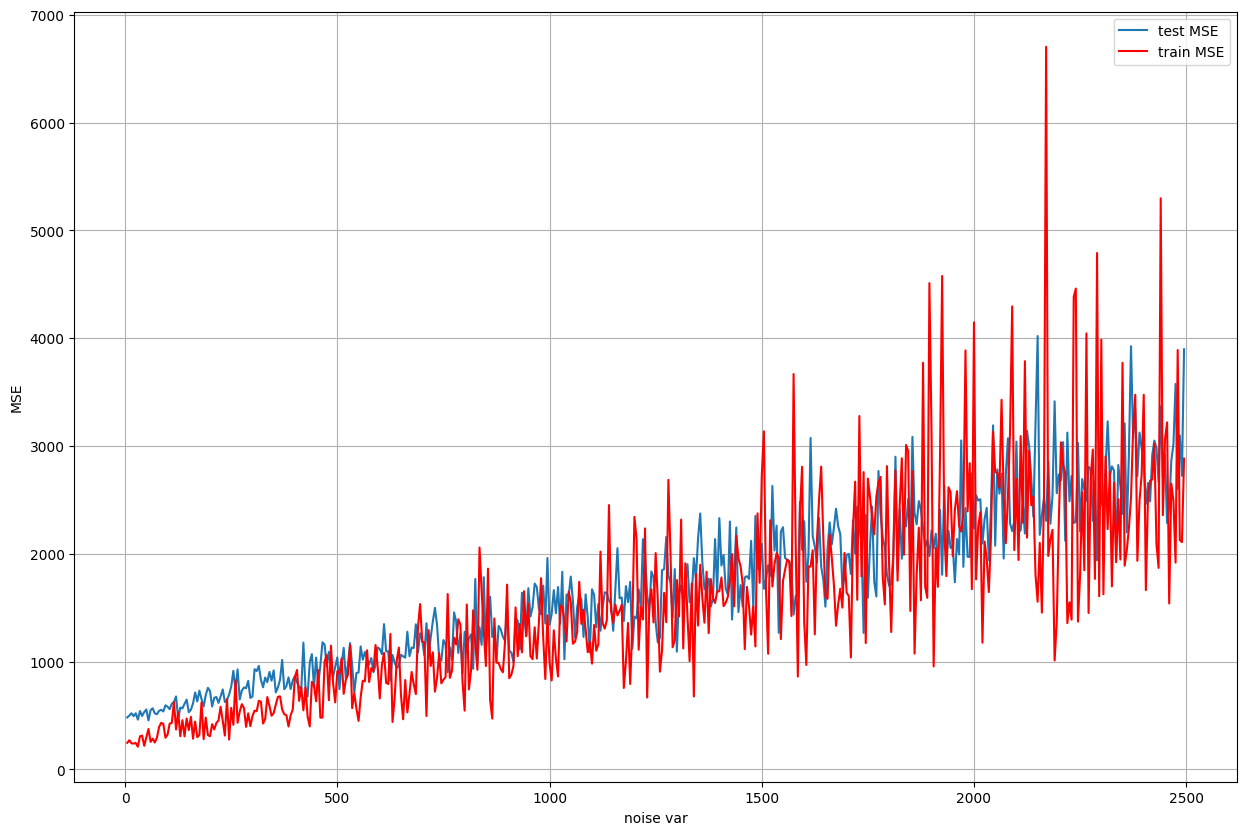

In [48]:
MSE_train_list = []
MSE_test_list = []
import random
random.seed(0)
Train, Test= train_test_split(ozon_data, test_size=0.2, random_state=42)
X_train = Train[['radiation', 'temperature', 'wind']]
y_train = Train[['ozone']]
X_test  = Test[['radiation', 'temperature', 'wind']]
y_test  = Test[['ozone']]

for var_noise in range(5,2500,5):
    
    
    train_y_noisy = y_train.to_numpy().T[0] + np.random.normal(0, np.sqrt(var_noise), len(y_train))
    test_y_noisy = y_test.to_numpy().T[0] + np.random.normal(0, np.sqrt(var_noise), len(y_test))

    regression_model = LinearRegression() 
    regression_model.fit(X_train, train_y_noisy) 

    y_train_predicted_noisy = regression_model.predict(X_train) 
    y_test_predicted_noisy = regression_model.predict(X_test) 
    MSE_train_list.append(mean_squared_error(train_y_noisy, y_train_predicted_noisy))
    MSE_test_list.append(mean_squared_error(test_y_noisy, y_test_predicted_noisy))

plt.figure(figsize=(15,10))
plt.plot(range(5,2500,5), MSE_train_list)
plt.plot(range(5,2500,5), MSE_test_list, color='r')
plt.legend(['test MSE', 'train MSE'])
plt.xlabel("noise var")
plt.ylabel("MSE")
plt.grid(True)



در تصویر فوق، همزمان دو نکته که قابل پیش بینی بود قابل برداشت است. نکته اول اینکه همواره معیار خطای "میانگین مربعات خطا"
در داده های آموزش کمتر از داده های تست است و این بخاطر آن است که ضرایب مدل بر اساس داده های آموزش مشخص گردیده اند.

در کنار این، در هر دو منحنی معیار خطای 'میانگین مربعات خطا' با افزایش واریانس نویز داده های لیبل، شاهد افزایش خطای این معیار هستیم

In [49]:
from sklearn.preprocessing import StandardScaler 


X_train_plus_features = np.concatenate((X_train.to_numpy(), X_train.to_numpy()**2), axis=1)
X_test_plus_features  = np.concatenate((X_test.to_numpy(), X_test.to_numpy()**2), axis=1)

scaler = StandardScaler(with_mean=True, with_std=True)
X_train_plus_features_norm = scaler.fit_transform(X_train_plus_features, y_train)
X_test_plus_features_norm = scaler.fit_transform(X_test_plus_features, y_test)

regression_model.fit(X=X_train_plus_features_norm, y=y_train)
print(regression_model.coef_)

y_train_predicted = regression_model.predict(X_train_plus_features_norm) 
mse_train = mean_squared_error(y_train,y_train_predicted) 
y_test_predicted = regression_model.predict(X_test_plus_features_norm) 
mse_test = mean_squared_error(y_test,y_test_predicted) 
print(f"MSE on train data = {mse_train}   MSE on test data = {mse_test}")



[[ 13.79731137 -74.20162652 -62.18363365  -7.6564661   86.72914808
   50.86977992]]
MSE on train data = 301.07318464970444   MSE on test data = 321.586238662884


# قسمت دوم


In [50]:
import os, os.path
import cv2

parent_path = "../Lab1/Cohn-Kanade/surprise videos/"
videos = os.listdir(parent_path)

idxs = np.arange(len(videos))
np.random.shuffle(idxs)
dirs = list(np.array(videos)[idxs])

X = []
y = []
for idx, sub_dir in enumerate(dirs):
    directory = parent_path + sub_dir + "/"
    images = os.listdir(directory)
    for img_num, img in enumerate(images):
        X.append(cv2.cvtColor(cv2.imread(directory + img), cv2.COLOR_BGR2GRAY))
        y.append(img_num/(len(images)-1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [51]:

twoD_to_vec = lambda mat: mat.reshape(-1).T
X_train_vectorized = list(map(twoD_to_vec, X_train))
X_test_vectorized  = list(map(twoD_to_vec, X_test))

# regression_model = LinearRegression() 
# regression_model.fit(X_train_vectorized, y_train) 

اگر دو خط آخر در سل بالا که برای آموزش دادن مدل میباشد را آنکامنت کنیم، میبینیم که فرایند ران شدن 
این سل بسیار طولانی مدت خواهد بود. علت این است که سایز ورودی های مدل و متعاقبا تعداد ویژگی هایی که باید یاد بگیرد، _به تعداد پیکسل ها_ خیلی زیاد است و برای همین دسترسی به حافظه رم محدود میباشد. در مجموع این کار حتی اگر با سیستم های با کانفیگ قدرتمند شدنی هم باشد اصلا معقول نیست.

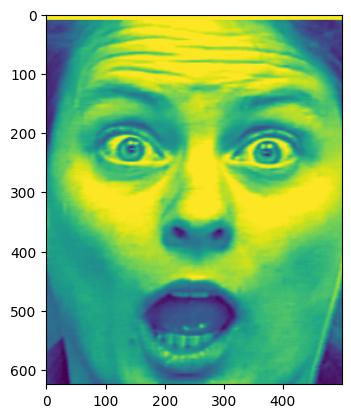

In [59]:
CropAndResize = lambda img: img[50:675:1, 350:850:1]

X_train_cropped = list(map(CropAndResize, X_train))
X_test_cropped = list(map(CropAndResize, X_test))

plt.imshow(X_train_cropped[10])


train MSE = 1.3929049939721976e-29
test MSE = 0.009020765854186912


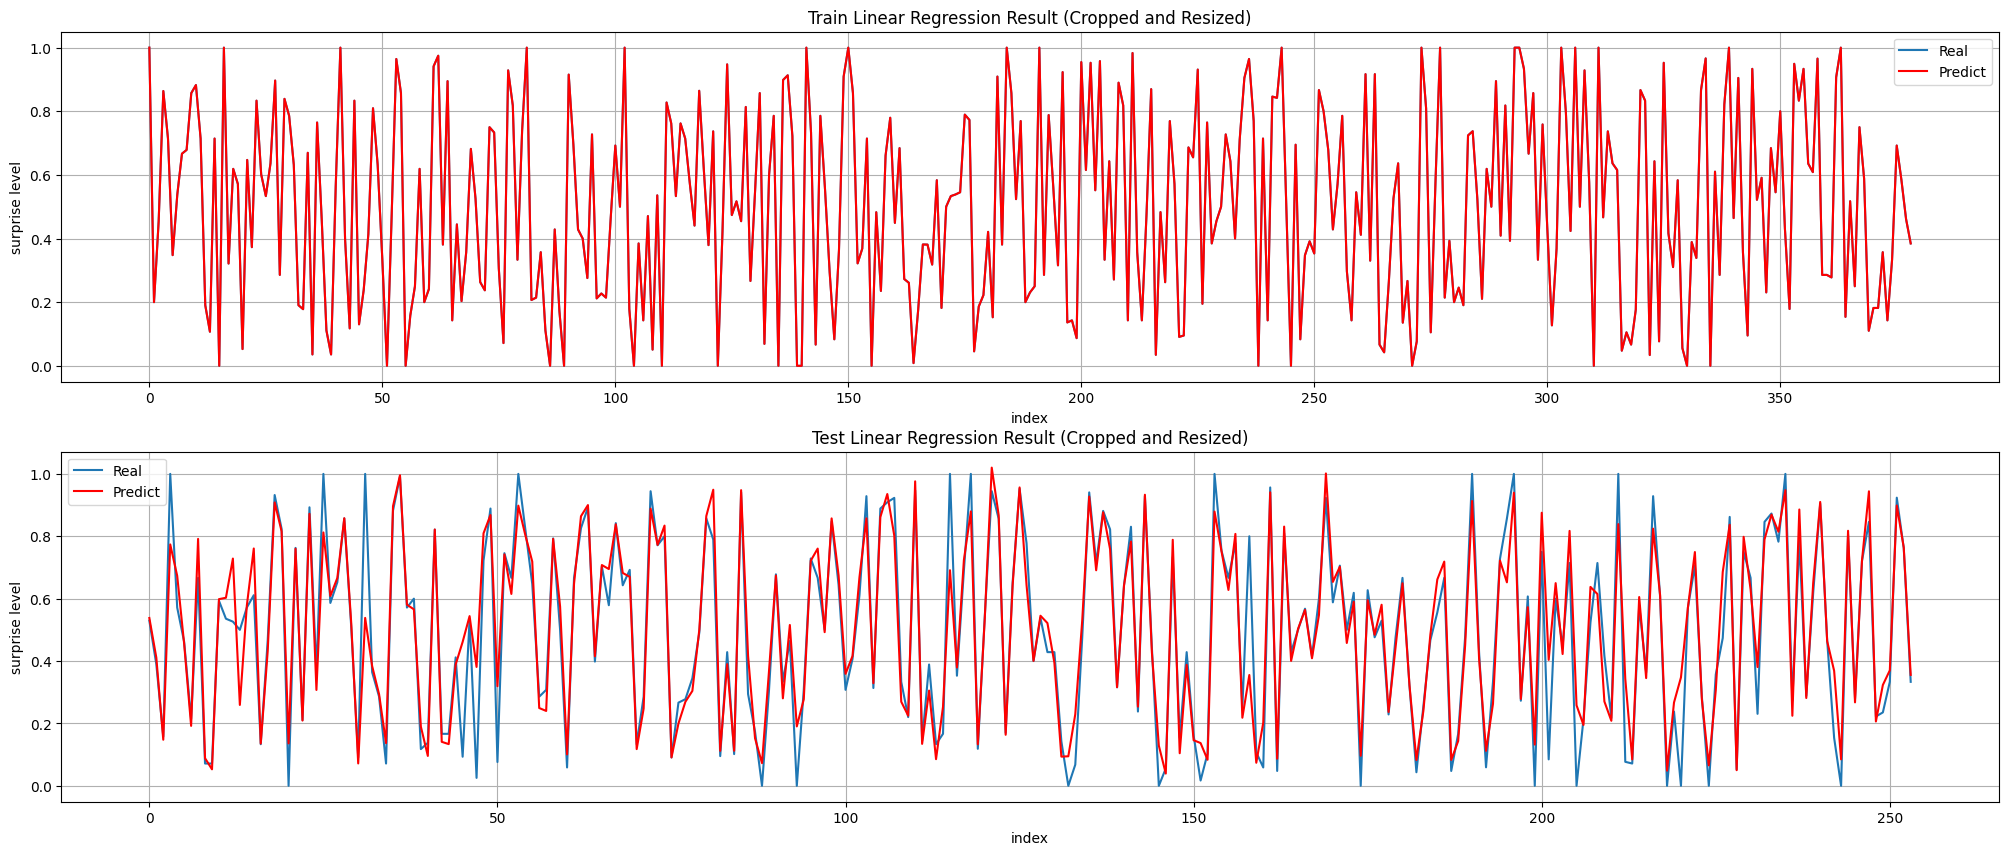

In [60]:
X_train_cropped_vectorized = list(map(twoD_to_vec, X_train_cropped))
X_test_cropped_vectorized = list(map(twoD_to_vec, X_test_cropped))

regression_model = LinearRegression() 
regression_model.fit(X_train_cropped_vectorized, y_train) 

y_train_cropped_vectorized_predicted = regression_model.predict(X_train_cropped_vectorized) 
y_test_cropped_vectorized_predicted = regression_model.predict(X_test_cropped_vectorized) 

MSE_train = np.mean((y_train_cropped_vectorized_predicted - y_train)**2)
MSE_test = np.mean((y_test_cropped_vectorized_predicted - y_test)**2)

print(f"train MSE = {MSE_train}")
print(f"test MSE = {MSE_test}")


plt.figure(figsize=(25,10))

plt.subplot(2,1,1)
plt.plot(np.arange(len(y_train)),y_train)
plt.plot(np.arange(len(y_train)),y_train_cropped_vectorized_predicted, color='r')
plt.title("Train Linear Regression Result (Cropped and Resized)")
plt.legend(["Real","Predict"])
plt.xlabel("index")
plt.ylabel("surprise level")
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(np.arange(len(y_test)),y_test)
plt.plot(np.arange(len(y_test)),y_test_cropped_vectorized_predicted, color='r')
plt.title("Test Linear Regression Result (Cropped and Resized)")
plt.legend(["Real","Predict"])
plt.xlabel("index")
plt.ylabel("surprise level")
plt.grid(True)


هم از معیار `میانگین مربعات خطا` و هم از نمودار ها واضح است که 
خطا روی داده های آموزش بسیار کم و تقریبا حتی صفر است. اما این خطا روی داده های تست هم مقدار مناسبی دارد و
اثری از اورفیت شدن نیست. بنابراین مدل توانسته به خوبی این رفتار را پیشبینی کند.

In [54]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=100)

x_train_crop_resize_flat_pca = pca.fit_transform(X_train_cropped_vectorized)#X_train_vectorized
x_test_crop_resize_flat_pca = pca.transform(X_test_cropped_vectorized)#X_test_vectorized


train error for 100 features = 0.0055442550125699005
test error for 100 features = 0.01511394638836363


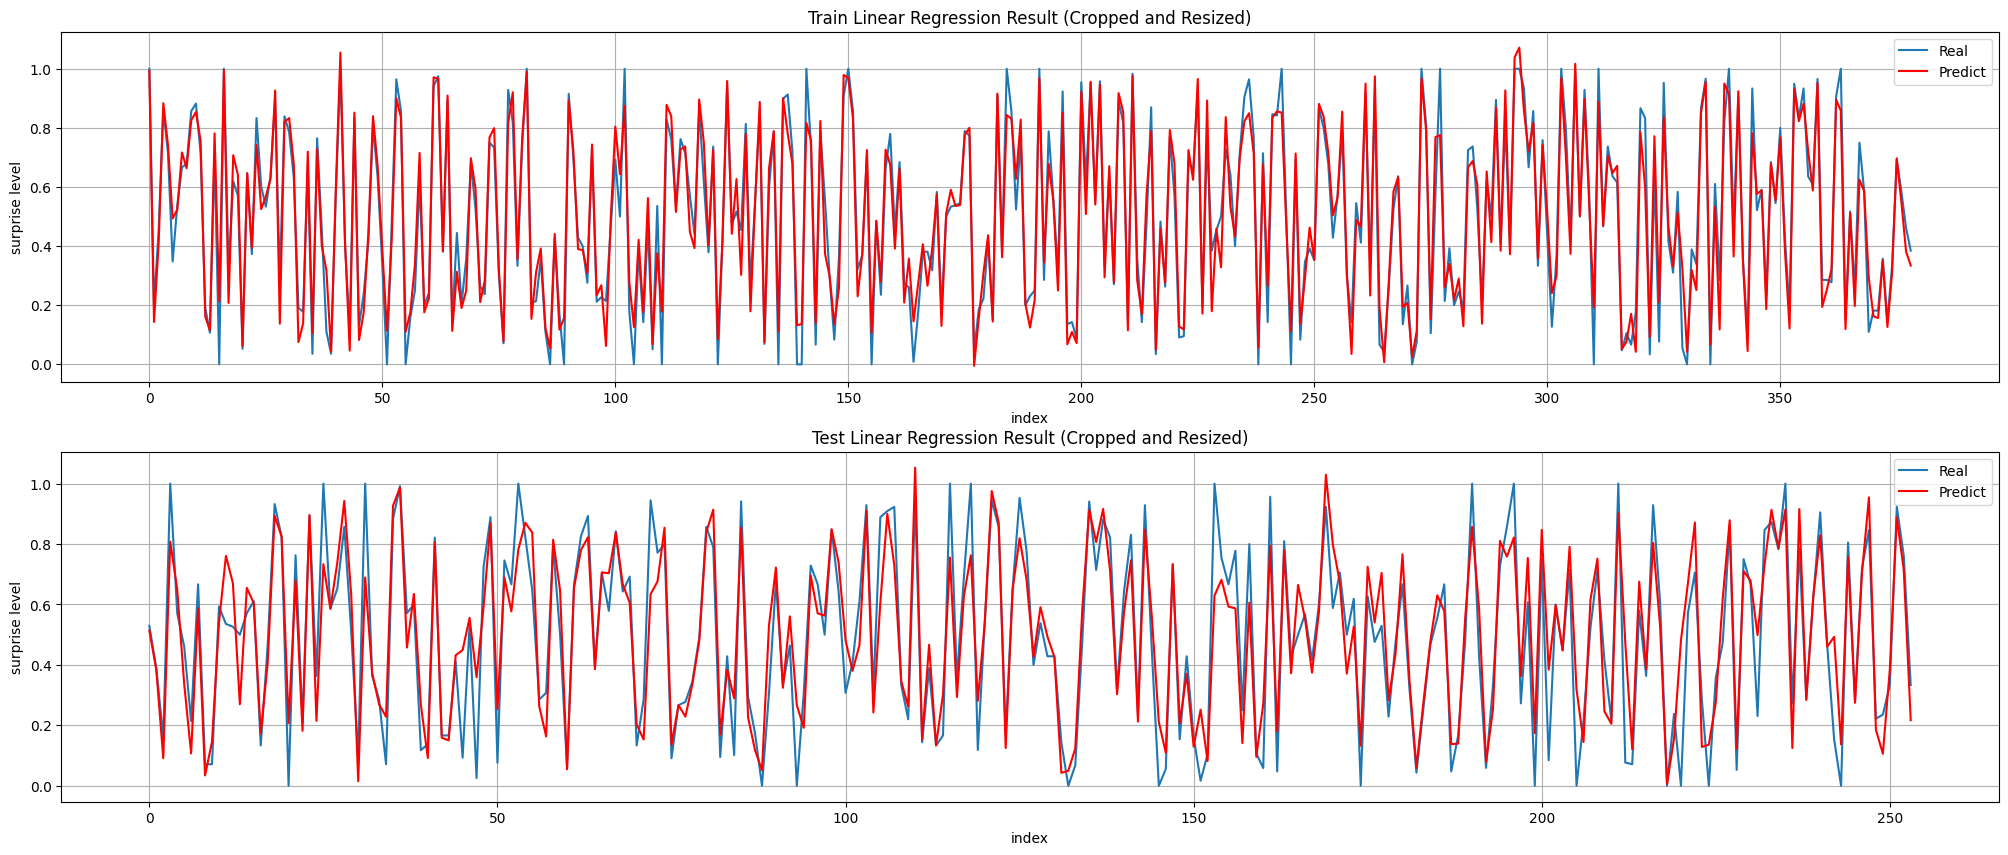

In [61]:
regression_model.fit(x_train_crop_resize_flat_pca, y_train)

y_train_crop_resize_flat_pca_pred = regression_model.predict(x_train_crop_resize_flat_pca)
y_test_crop_resize_flat_pca_pred = regression_model.predict(x_test_crop_resize_flat_pca)

MSE_train = np.mean((y_train_crop_resize_flat_pca_pred - y_train)**2)
MSE_test = np.mean((y_test_crop_resize_flat_pca_pred - y_test)**2)

print(f"train error for 100 features = {MSE_train}")
print(f"test error for 100 features = {MSE_test}")



plt.figure(figsize=(25,10))

plt.subplot(2,1,1)
plt.plot(np.arange(len(y_train)),y_train)
plt.plot(np.arange(len(y_train)),y_train_crop_resize_flat_pca_pred, color='r')
plt.title("Train Linear Regression Result (Cropped and Resized)")
plt.legend(["Real","Predict"])
plt.xlabel("index")
plt.ylabel("surprise level")
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(np.arange(len(y_test)),y_test)
plt.plot(np.arange(len(y_test)),y_test_crop_resize_flat_pca_pred, color='r')
plt.title("Test Linear Regression Result (Cropped and Resized)")
plt.legend(["Real","Predict"])
plt.xlabel("index")
plt.ylabel("surprise level")
plt.grid(True)

تلاش کردیم تا در مدل بهبود ایجاد کنیم. `ماسک کردن و کاهش سایز`در قسمت قبل صرفا با

در این قسمت با استفاده از این داده ها، از روش 
pca
نیز کمک گرفته ایم تا باز هم فضای ابعاد داده ها را کاهش دهیم.

همانطور که در دو سل بالا مشاهده میشود، زمان پردازش با این روش هرچند کاهش یافته اما دقت مدل نیز کمی کاهش یافته است.

این یک 
Tradeoff
ذاتی میان زمان پردازش-دقت مدل میباشد

هرچند این حد از کاهش مدل در مقابل پردازش سریعتر قابل قبول است.

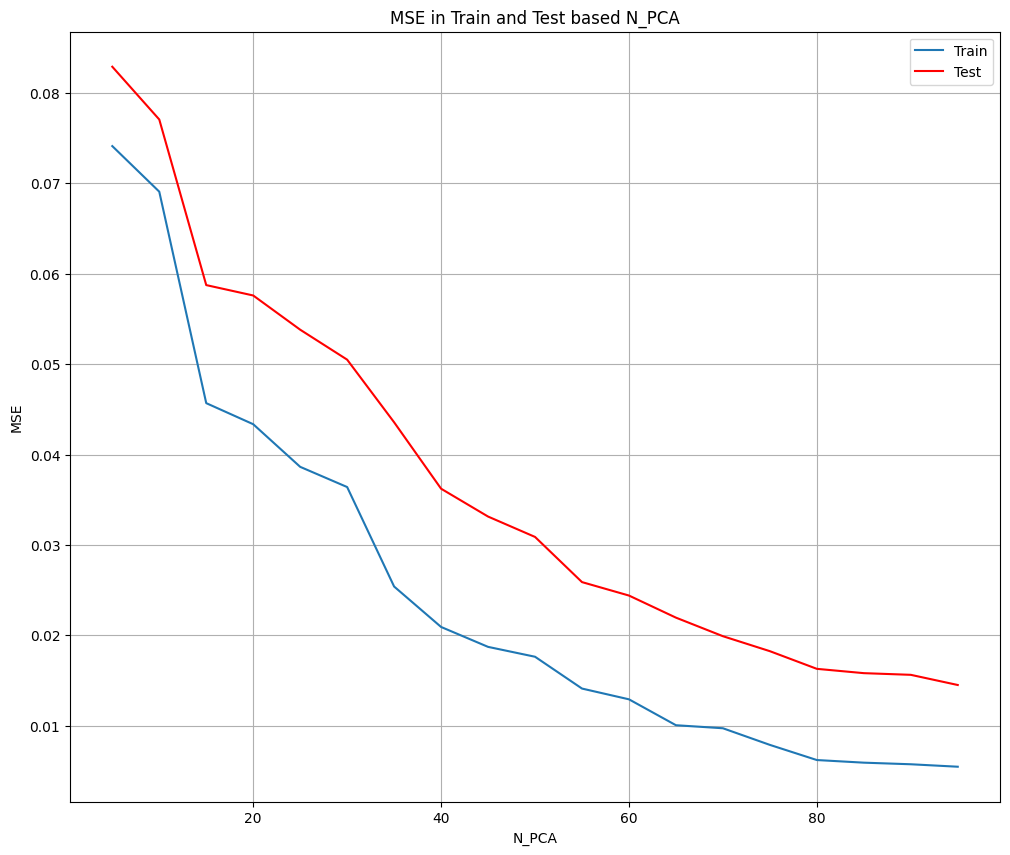

In [62]:
MSE_Train_All = []
MSE_Test_All  = []

for n_features in range(5,100,5):
    pca = decomposition.PCA(n_components=n_features)
    x_train_crop_resize_flat_pca = pca.fit_transform(X_train_cropped_vectorized)#X_train_vectorized
    x_test_crop_resize_flat_pca = pca.transform(X_test_cropped_vectorized)#X_test_vectorized

    regression_model.fit(x_train_crop_resize_flat_pca, y_train)

    y_train_crop_resize_flat_pca_pred = regression_model.predict(x_train_crop_resize_flat_pca)
    y_test_crop_resize_flat_pca_pred = regression_model.predict(x_test_crop_resize_flat_pca)

    MSE_Train_All.append(np.mean((y_train_crop_resize_flat_pca_pred - y_train)**2))
    MSE_Test_All.append(np.mean((y_test_crop_resize_flat_pca_pred - y_test)**2))


plt.figure(figsize=(12,10))
plt.plot(range(5,100,5),MSE_Train_All)
plt.plot(range(5,100,5),MSE_Test_All, color='r')
plt.title("MSE in Train and Test based N_PCA")
plt.legend(["Train","Test"])
plt.xlabel("N_PCA")
plt.ylabel("MSE")
plt.grid(True)
